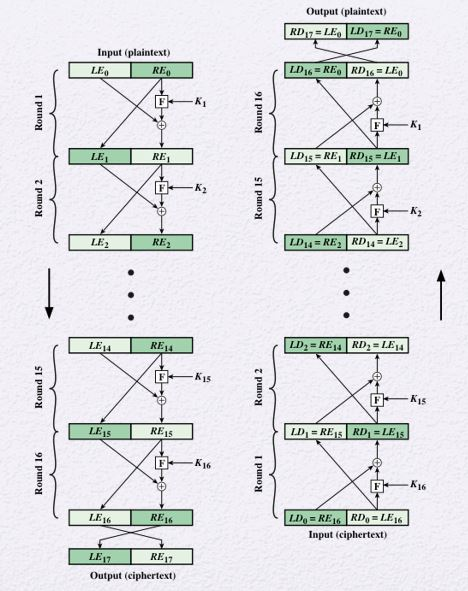

In [ ]:
# we can define byte sequences and variables in Python using the b prefix
# For example a byte value of 10011010 can be shown in hex digits as 9A and in python as
byte1 = b'\x9a\x79\x45'
byte2 = b'\x8c'
print(byte1,byte2)

b'\x9ayE' b'\x8c'


In [ ]:
# another helpful list operation in python:
# You can construct lists with short hand notations involving FOR loops. For example if I want to convert a string to a list, I can construct a list
# with each of its elements taken from one character in the input string, all in one line
inputstr = "my string"
# I want ot construct ['m', 'y', ' ', 's', ..., 'g']
# instead of 
#mylist = []
#for c in inputstr:
#  mylist.append(c)
# I can have
mylist = [a for a in inputstr]
# This is the equivalent of
mylist2 = []
for a in inputstr:
  mylist2.append(a)

print(mylist)
print(mylist2)


['m', 'y', ' ', 's', 't', 'r', 'i', 'n', 'g']
['m', 'y', ' ', 's', 't', 'r', 'i', 'n', 'g']


In [7]:
# Now we can define a simple function to perform bitwise XOR on two byte sequences
b1 = b'\xaa\x33'
b2 = b'\xcc\x55'
# 1010101000110011
# 1100110001010101
# 0110011001100110
# \x66\x66
def xor(byteseq1, byteseq2):
  #print(byteseq1)
  #print(byteseq2)
  # Python already provides the ^ operator to do xor on interger values
  # but first we need to break our input byte sequences into byte size integers
  l1 = [b for b in byteseq1]
  l2 = [b for b in byteseq2]
  
  l1attachl2 = zip(l1,l2)
  # zip(l1,l2) is actually a list as [(b'\xaa',b'\xcc), (b'\x33', b'\x55')]

  l1xorl2 = [bytes([elem1^elem2]) for elem1,elem2 in l1attachl2]

  result = b''.join(l1xorl2)

  return result

result = xor(b1,b2)
print(b1, ' xor ',b2,' = ',result)


b'\xaa3'  xor  b'\xccU'  =  b'ff'


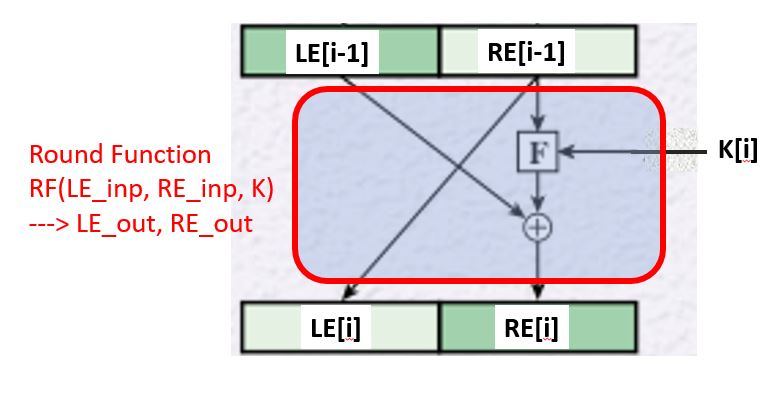

In [ ]:
# we want to define the main building block of the feistel cipher as a function with 3 inputs and 2 outputs
def feistel_block(LE_inp, RE_inp, k):
  # Does the necessary operations


  return LE_out, RE_out

# As we discussed, feistel operation doesn't depend on the choice of the F function (its encryption strength does)
# Let's all use the same function that uses a good mixing operation using hash functions that we will learn later
import hmac
import hashlib
import random

def F(byteseq, k, outputlen):
  # we use the hmac hash (don't worry about the meaning for now)
  h = hmac.new(k, byteseq, hashlib.sha1)
  # return the first outputlen bytes of the hash value
  return h.digest()[:outputlen]

#foutput = F(b'\x23', b'\x45')
#print(foutput)

# In a real Feistel implementation, different keys are used in different rounds. Here
# we use 64bit keys so for 16 rounds, we need 16 random 8byte keys. We can just generate
# 16 random 8 byte numbers we use the random.randint() function to be able to set the seed
# value and create the same keys for both the encoder and the decoder
def gen_keylist(keylenbytes, numkeys, seed):
    # We need to generate numkeys keys each being keylen bytes long
    random.seed(seed)
    
    # Use the random.randint(min,max) function to generate individual
    # random integers in range [min, max]. Generate a list of numkeys
    # random byte sequences each of them keylenbytes bytes long to be used as 
    # keys for numkeys stages of the feistel encoder. To make sure we have control over
    # the generated random numbers meaning that the same sequence is 
    # generated in different runs of our program, 
    
    # keylist = [numkeys elements of 'bytes' type and keylenbytes bytes long each]
    keylist = []
    for i in range(numkeys):
      bytelist = [bytes([random.randint(0,255)]) for x in range(keylenbytes)]
      keylist.append(bytelist)
    # example [b'\x12\xa4\x2f\xb4\x67\x80\xd4\x12', and 15 more if numkeys is 16]
    return keylist

# Now the actual encoder
def feistel_enc(inputbyteseq, num_rounds, masterkey):
    # This is the function that accepts one bloc of plaintext
    # and applies all rounds of the feistel cipher and returns the
    # cipher text block. 
    # Inputs:
    # inputblock: byte sequence representing input block
    # num_rounds: integer representing number of rounds in the feistel 
    # seed: integer to set the random number generator to defined state
    # Output:
    # cipherblock: byte sequence
    
    # first generate the required keys
    keylist = gen_keylist(8, num_rounds, masterkey)

    # implement num_rounds of calling the block function

    
    return cipherblock

def feistel_dec(inputbytteseq, num_rounds, masterkey):

  # Make sure you use the keys in reverse order during decryption
  keylist = gen_keylist(8, num_rounds, masterkey)

  # apply the num_rounds times of the block funciton

  return plaintextblock

